In [106]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import pandas as pd

### Load the data

In [107]:
data = pd.read_csv("../data/alzheimers_disease_data_balanced_gemini.csv")
data = data.drop("DoctorInCharge", axis=1) # this attribute is confidential in the data, and thus not useful 
eth_col = data.pop("Ethnicity")
data["PatientID"] = data["PatientID"].astype('int64')
data["Age"] = data["Age"].astype("int64")
data["Gender"] = data["Gender"].astype("int64")

data.insert(3, "Ethnicity", eth_col)
data["Ethnicity"] = data["Ethnicity"].astype("int64")
data["EducationLevel"] = data["EducationLevel"].astype("int64")
data["Smoking"] = data["Smoking"].astype("int64")
data["FamilyHistoryAlzheimers"] = data["FamilyHistoryAlzheimers"].astype("int64")
data["CardiovascularDisease"] = data["CardiovascularDisease"].astype("int64")
data["Diabetes"] = data["Diabetes"].astype("int64")
data["Depression"] = data["Depression"].astype("int64")
data["HeadInjury"] = data["HeadInjury"].astype("int64")
data["Hypertension"] = data["Hypertension"].astype("int64")
data["SystolicBP"] = data["SystolicBP"].astype("int64")
data["DiastolicBP"] = data["DiastolicBP"].astype("int64")
data["MemoryComplaints"] = data["MemoryComplaints"].astype("int64")
data["BehavioralProblems"] = data["BehavioralProblems"].astype("int64")
data["Confusion"] = data["Confusion"].astype("int64")
data["Disorientation"] = data["Disorientation"].astype("int64")
data["PersonalityChanges"] = data["PersonalityChanges"].astype("int64")
data["DifficultyCompletingTasks"] = data["DifficultyCompletingTasks"].astype("int64")
data["Forgetfulness"] = data["Forgetfulness"].astype("int64")
data["Diagnosis"] = data["Diagnosis"].astype("int64")


data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,6.518877,0,0,1.725883,0,0,0,1,0,0
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,7.118696,0,0,2.592424,0,0,0,0,1,0
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,5.895077,0,0,7.119548,0,1,0,1,0,0
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,8.965106,0,1,6.481226,0,0,0,0,0,0
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,6.045039,0,0,0.014691,0,0,1,1,0,0


In [108]:
# Check for hallucinations
from pandas.testing import assert_frame_equal

original_data = pd.read_csv("../data/alzheimers_disease_data.csv")
original_data = original_data.drop("DoctorInCharge", axis=1)
assert_frame_equal(original_data, data[:2149])


In [109]:
data.isna().sum() # check for missing values

PatientID                    0
Age                          0
Gender                       0
Ethnicity                    0
EducationLevel               0
BMI                          0
Smoking                      0
AlcoholConsumption           0
PhysicalActivity             0
DietQuality                  0
SleepQuality                 0
FamilyHistoryAlzheimers      0
CardiovascularDisease        0
Diabetes                     0
Depression                   0
HeadInjury                   0
Hypertension                 0
SystolicBP                   0
DiastolicBP                  0
CholesterolTotal             0
CholesterolLDL               0
CholesterolHDL               0
CholesterolTriglycerides     0
MMSE                         0
FunctionalAssessment         0
MemoryComplaints             0
BehavioralProblems           0
ADL                          0
Confusion                    0
Disorientation               0
PersonalityChanges           0
DifficultyCompletingTasks    0
Forgetfu

### Split the data

In [110]:
X, y = data.drop("Diagnosis", axis=1), data["Diagnosis"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=22, stratify=y)
X_train.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MMSE,FunctionalAssessment,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness
4025,8776,73,0,3,3,18.318611,0,11.278738,5.409996,8.241580,...,20.229407,0.500602,0,0,0.851234,1,0,0,0,0
1231,5982,84,1,3,1,36.155836,0,16.234038,1.151020,8.022064,...,20.381098,2.654941,0,0,2.114123,0,1,0,0,0
4639,9390,81,1,2,2,35.485853,0,7.074728,7.991286,0.572258,...,4.650657,6.097099,0,0,8.804801,0,1,0,1,1
1497,6248,61,0,2,3,37.953265,0,17.946262,2.661599,7.374352,...,19.735149,3.698690,1,0,0.431788,0,0,0,0,0
1556,6307,76,0,1,0,24.044037,0,5.291634,3.538057,9.865788,...,20.800115,6.371574,1,0,9.569761,0,0,0,1,0


### Train the model

In [111]:
classifier = MLPClassifier(max_iter=5000, random_state=12)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86       827
           1       0.87      0.49      0.63       451

    accuracy                           0.79      1278
   macro avg       0.82      0.73      0.74      1278
weighted avg       0.81      0.79      0.78      1278



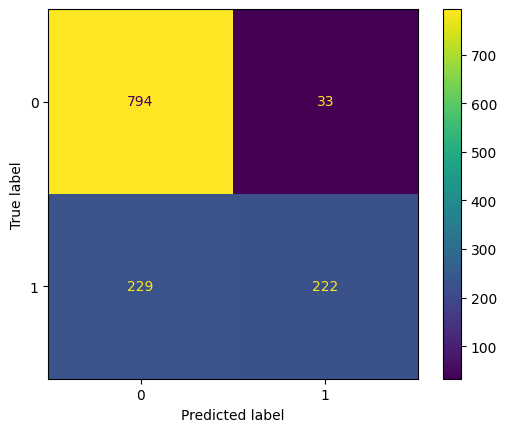

In [113]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

In [114]:
data["Ethnicity"].value_counts()

Ethnicity
0    1278
3    1278
1    1278
2    1278
Name: count, dtype: int64

### Compare performance based on ethnicity

In [115]:
# Join X_test, y_test, y_pred for analysis
results = X_test.copy()
results["TrueDiagnosis"] = y_test
results["PredictedDiagnosis"] = y_pred

              precision    recall  f1-score   support

           0       0.75      0.97      0.85       212
           1       0.91      0.48      0.63       129

    accuracy                           0.79       341
   macro avg       0.83      0.73      0.74       341
weighted avg       0.81      0.79      0.77       341



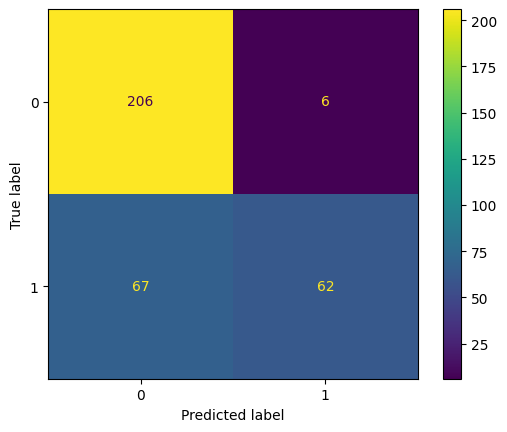

In [116]:
# Ethnicity 0
eth0_results = results[results["Ethnicity"] == 0]
print(classification_report(eth0_results["TrueDiagnosis"], eth0_results["PredictedDiagnosis"]))
cm = confusion_matrix(eth0_results["TrueDiagnosis"], eth0_results["PredictedDiagnosis"])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       214
           1       0.73      0.45      0.55        85

    accuracy                           0.80       299
   macro avg       0.77      0.69      0.71       299
weighted avg       0.79      0.80      0.78       299



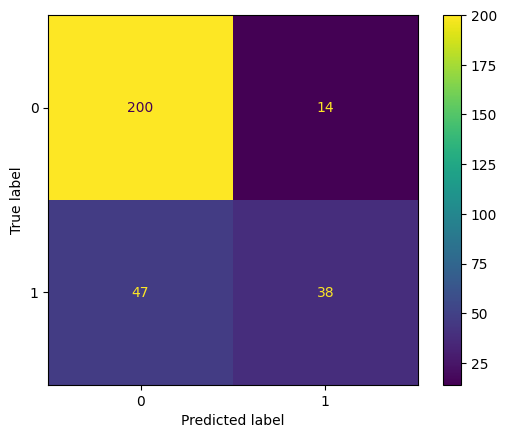

In [117]:
# Ethncity 1
eth1_results = results[results["Ethnicity"] == 1]
print(classification_report(eth1_results["TrueDiagnosis"], eth1_results["PredictedDiagnosis"]))
cm = confusion_matrix(eth1_results["TrueDiagnosis"], eth1_results["PredictedDiagnosis"])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

              precision    recall  f1-score   support

           0       0.77      0.99      0.87       192
           1       0.99      0.58      0.73       137

    accuracy                           0.82       329
   macro avg       0.88      0.79      0.80       329
weighted avg       0.86      0.82      0.81       329



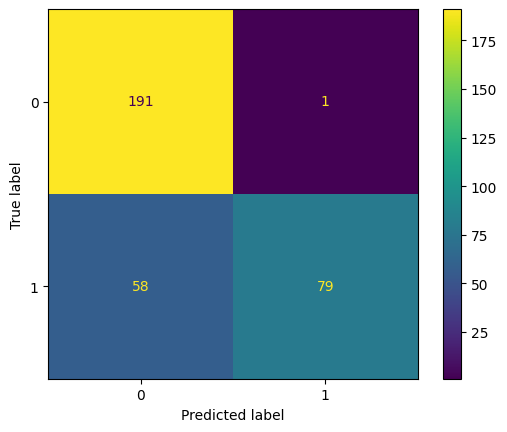

In [118]:
# Ethnicity 2
eth2_results = results[results["Ethnicity"] == 2]
print(classification_report(eth2_results["TrueDiagnosis"], eth2_results["PredictedDiagnosis"]))
cm = confusion_matrix(eth2_results["TrueDiagnosis"], eth2_results["PredictedDiagnosis"])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

              precision    recall  f1-score   support

           0       0.78      0.94      0.85       209
           1       0.78      0.43      0.55       100

    accuracy                           0.78       309
   macro avg       0.78      0.69      0.70       309
weighted avg       0.78      0.78      0.76       309



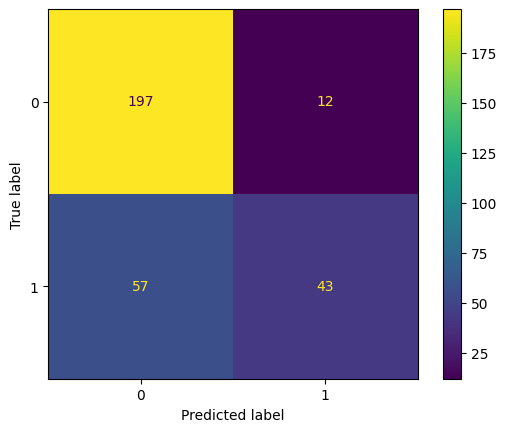

In [119]:
# Ethncity 3
eth3_results = results[results["Ethnicity"] == 3]
print(classification_report(eth3_results["TrueDiagnosis"], eth3_results["PredictedDiagnosis"]))
cm = confusion_matrix(eth3_results["TrueDiagnosis"], eth3_results["PredictedDiagnosis"])
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()

In [120]:
from fairness_metrics import demographic_parity, equal_opportunity, disparate_impact, equalized_odds

# DI >= 0.8 is a pre-established threshold for fairness
# DP and EO need to be as close to 0 as possible

dp = demographic_parity(results, 0, 1)
eo = equal_opportunity(results, 0, 1)
eod = equalized_odds(results, 0, 1)
di = disparate_impact(results, 0, 1)

print(dp, eod, di)

from fairness_metrics import demographic_parity, equal_opportunity, disparate_impact, equalized_odds

# DI >= 0.8 is a pre-established threshold for fairness
# DP and EO need to be as close to 0 as possible

dp = demographic_parity(results, 0, 2)
eo = equal_opportunity(results, 0, 2)
eod = equalized_odds(results, 0, 2)
di = disparate_impact(results, 0, 2)

print(dp, eod, di)


from fairness_metrics import demographic_parity, equal_opportunity, disparate_impact, equalized_odds

# DI >= 0.8 is a pre-established threshold for fairness
# DP and EO need to be as close to 0 as possible

dp = demographic_parity(results, 0, 3)
eo = equal_opportunity(results, 0, 3)
eod = equalized_odds(results, 0, 3)
di = disparate_impact(results, 0, 3)

print(dp, eod, di)

0.025500446257809506 [-0.033561331509347925, 0.037118673955210714] 1.1466275659824046
0.04374760448885365 [0.09602218072766361, -0.0230935534591195] 0.8200879765395894
0.02141996222797976 [-0.05062015503875972, 0.029114381150130902] 1.1203412423353771
